In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import json

In [4]:
from var_table import VarTable

In [5]:
var_table = VarTable()

In [6]:
group_name = 'G2'
experiments_count = 5
fitnesses_dataset = {}
durations_dataset = {}

In [7]:
def find_data_by_name(dataset, name):
    for data in dataset:
        data_name = data['name']
        if data_name == name:
            return data

In [8]:
def find_solution_by_config(solutions, config):
    for solution in solutions:
        solution_config = solution['config']
        if solution_config == config:
            return solution

In [9]:
def get_results(solver_name, config):
    fitnesses = []
    durations = []
    for experiment_number in range(1, experiments_count + 1):
        nested_directory = var_table.get_nested_directory(group_name, experiment_number)
        file_path = '{}/solutions.json'.format(nested_directory)
        file = open(file_path, 'r')
        content = file.read()
        dataset = json.loads(content)
        file.close()
        data = find_data_by_name(dataset, solver_name)
        solutions = data['solutions']
        solution = find_solution_by_config(solutions, config)
        result = solution['result']
        fitness = result['fitness']
        duration = result['duration']
        fitnesses.append(fitness)
        durations.append(duration)
    return fitnesses, durations

In [10]:
# configs

In [11]:
solver_config = {
    'k': 3
}

In [12]:
genetic_config = {
    'k': 3,
    'num_generations': 100,
    'sol_per_pop': 4,
    'num_parents_mating': 2,
    'parent_selection_type': 'sss',
    'keep_parents': 1,
    'crossover_type': 'scattered',
    'mutation_type': 'scramble',
    'mutation_percent_genes': 10
}

In [13]:
rl_config = {
    'k': 2,
    'total_timesteps': 100
}

In [14]:
# glpk
glpk_solver_name = 'glpk'
glpk_fitnesses, glpk_durations = get_results(glpk_solver_name, solver_config)

fitnesses_dataset[glpk_solver_name] = glpk_fitnesses
durations_dataset[glpk_solver_name] = glpk_durations

In [15]:
# xpress
xpress_solver_name = 'xpress'
# xpress_fitnesses, xpress_durations = get_results(xpress_solver_name, solver_config)

# fitnesses_dataset[xpress_solver_name] = xpress_fitnesses
# durations_dataset[xpress_solver_name] = xpress_durations

In [16]:
# cbc
cbc_solver_name = 'cbc'
cbc_fitnesses, cbc_durations = get_results(cbc_solver_name, solver_config)

fitnesses_dataset[cbc_solver_name] = cbc_fitnesses
durations_dataset[cbc_solver_name] = cbc_durations

In [17]:
# mpec_minlp
# mpec_minlp_solver_name = 'mpec_minlp'
# mpec_minlp_fitnesses, mpec_minlp_durations = get_results(mpec_minlp_solver_name, solver_config)

# fitnesses_dataset[mpec_minlp_solver_name] = mpec_minlp_fitnesses
# durations_dataset[mpec_minlp_solver_name] = mpec_minlp_durations

In [18]:
# ilogcp
# ilogcp_solver_name = 'ilogcp'
# ilogcp_fitnesses, ilogcp_durations = get_results(ilogcp_solver_name, solver_config)

# fitnesses_dataset[ilogcp_solver_name] = ilogcp_fitnesses
# durations_dataset[ilogcp_solver_name] = ilogcp_durations

In [19]:
# binary_genetic
binary_genetic_solver_name = 'binary_genetic'
binary_genetic_fitnesses, binary_genetic_durations = get_results(binary_genetic_solver_name, genetic_config)

fitnesses_dataset[binary_genetic_solver_name] = binary_genetic_fitnesses
durations_dataset[binary_genetic_solver_name] = binary_genetic_durations

In [20]:
# discrete_genetic
discrete_genetic_solver_name = 'discrete_genetic'
discrete_genetic_fitnesses, discrete_genetic_durations = get_results(discrete_genetic_solver_name, genetic_config)

fitnesses_dataset[discrete_genetic_solver_name] = discrete_genetic_fitnesses
durations_dataset[discrete_genetic_solver_name] = discrete_genetic_durations

In [21]:
# binary_rl_A2C
# binary_rl_A2C_solver_name = 'binary_rl_A2C'
# binary_rl_A2C_fitnesses, binary_rl_A2C_durations = get_results(binary_rl_A2C_solver_name, rl_config)

# fitnesses_dataset[binary_rl_A2C_solver_name] = binary_rl_A2C_fitnesses
# durations_dataset[binary_rl_A2C_solver_name] = binary_rl_A2C_durations

In [22]:
# binary_rl_PPO
# binary_rl_PPO_solver_name = 'binary_rl_PPO'
# binary_rl_PPO_fitnesses, binary_rl_PPO_durations = get_results(binary_rl_PPO_solver_name, rl_config)

# fitnesses_dataset[binary_rl_PPO_solver_name] = binary_rl_PPO_fitnesses
# durations_dataset[binary_rl_PPO_solver_name] = binary_rl_PPO_durations

In [23]:
# discrete_rl_A2C
# discrete_rl_A2C_solver_name = 'discrete_rl_A2C'
# discrete_rl_A2C_fitnesses, discrete_rl_A2C_durations = get_results(discrete_rl_A2C_solver_name, rl_config)

# fitnesses_dataset[discrete_rl_A2C_solver_name] = discrete_rl_A2C_fitnesses
# durations_dataset[discrete_rl_A2C_solver_name] = discrete_rl_A2C_durations

In [24]:
# discrete_rl_PPO
# discrete_rl_PPO_solver_name = 'discrete_rl_PPO'
# discrete_rl_PPO_fitnesses, discrete_rl_PPO_durations = get_results(discrete_rl_PPO_solver_name, rl_config)

# fitnesses_dataset[discrete_rl_PPO_solver_name] = discrete_rl_PPO_fitnesses
# durations_dataset[discrete_rl_PPO_solver_name] = discrete_rl_PPO_durations

In [25]:
def draw_fitnesses_plot(df):

    experiment_number = list(df.index)
    for i in range(len(experiment_number)):
        experiment_number[i] = experiment_number[i] + 1
    df = df.assign(experiment_number = experiment_number)
    
    g = sns.PairGrid(df, x_vars=df.columns[:-1], y_vars=["experiment_number"])
    g.map(sns.stripplot, size=10, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")
    g.set(xlabel="", ylabel="")
    
    titles = list(df.columns)
    
    for ax, title in zip(g.axes.flat, titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    
    sns.despine(left=True, bottom=True)

In [26]:
def draw_durations_polt(df):
    plt.title('durations')
    plt.xlabel('experiment')
    plt.ylabel('duration, sec')
    sns.lineplot(data=df)

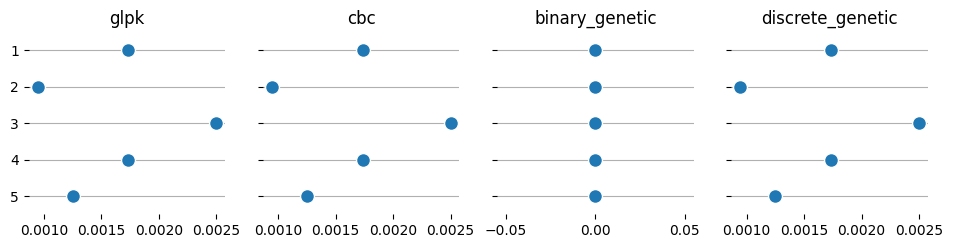

In [27]:
# Отрисовка графиков fitness значений
fitnesses_df = pd.DataFrame(fitnesses_dataset)

# По 5 столбцов на одном графике
# fitnesses_dfs = np.split(fitnesses_df, [5], axis=1)

# for fitness_df in fitnesses_dfs:
draw_fitnesses_plot(fitnesses_df)

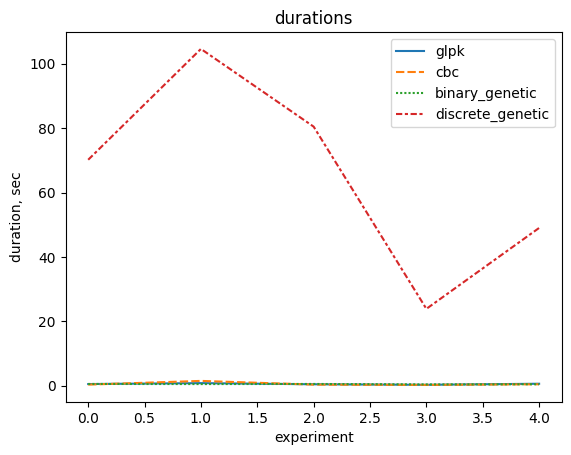

In [28]:
# Отрисовка графика длительностей экспериментов
durations_df = pd.DataFrame(durations_dataset)
draw_durations_polt(durations_df)